In [1]:
#Importing necessary libraries
import pandas as pd
from pandas import *
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing thr train data
data = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

# EXPLORATORY DATA ANALYSIS & DATASET VISUALISATION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [4]:
data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
data.head(10)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
8,2008-12-13,38,unemployed,divorced,primary,yes,14123,yes,yes,cellular,2370,4,852,4,other,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no


In [6]:
data.isnull().sum()    #Finding out missing values in the dataset

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [7]:
# treating the missing values
data["job"] = np.where(data["job"].isna(),data["job"].mode(),data["job"])
data["education"] = np.where(data["education"].isna(),data["education"].mode(),data["education"])
data["contact"] = np.where(data["contact"].isna(),data["contact"].mode(),data["contact"])
data["poutcome"] = np.where(data["poutcome"].isna(),data["poutcome"].mode(),data["poutcome"])

In [8]:
data.isnull().sum() #The missing values have successfully been replaced

last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
target               0
dtype: int64

In [9]:
data["last contact date"] = to_datetime(data["last contact date"],format="mixed")  #Converting 'last contact date' into a datetime object

In [10]:
data["year"] = data["last contact date"].apply(lambda x: x.year) #Extracting the year data from given dates

In [11]:
data.drop(columns=["last contact date"],inplace = True)  # Removing the 'last contact date column'

<Axes: >

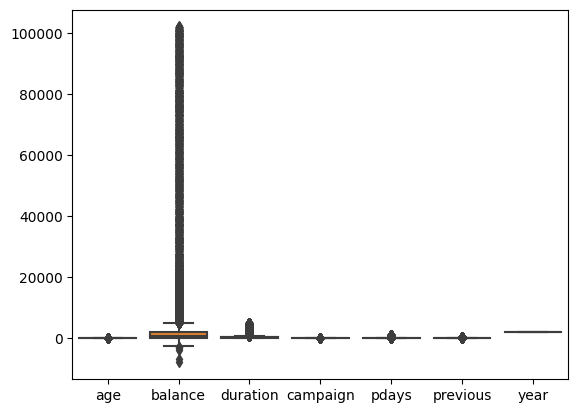

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data)
#Plotting a boxplot of the given dataset

**This boxplot shows the distribution of several variables on the x-axis (e.g., age, balance, duration, campaign, pdays, previous, and year) and their corresponding values on the y-axis.**

**Balance:**

1. This variable has an **extreme range**, with **many outliers** extending upwards, as indicated by the numerous data points far above the upper whisker.
2. The interquartile range (IQR) and median are small compared to the scale of outliers.

**Other Variables (age, duration, campaign, pdays, previous, year):**

1. These variables have much smaller ranges and appear to cluster near zero, with relatively few outliers.
2. Their boxplots are compressed due to the scale of the balance variable.


In [13]:
Q1 = np.percentile(data["balance"],25,method="midpoint")       #Defining a function Outlier Detection to mitigate 'Balance' of the high amount of outliers
Q3 = np.percentile(data["balance"],75,method="midpoint")
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

def outlier_detection(x):
    if x <= upper and x >= lower:
        return x
    else:
        data["balance"].median()

In [14]:
data["balance"] = data["balance"].apply(outlier_detection)

<Axes: >

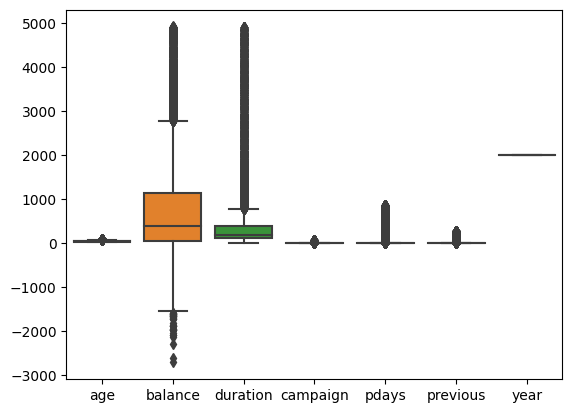

In [15]:
sns.boxplot(data)

# NUMERIC FEATURES DISTRIBUTION & CORRRELATION

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target column
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])  # Converting 'yes' to 1 and 'no' to 0

# Selecting numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Computing the correlation matrix
correlation_matrix = numeric_data.corr()


specific_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'] 

# Extracting correlation for the target column
target_correlation = correlation_matrix['target']

# Filtering and printing correlation for the numeric columns
print(target_correlation[specific_columns].sort_values(ascending=False))


duration    0.343325
previous    0.263123
pdays       0.258120
campaign    0.217205
age         0.111939
balance     0.094230
Name: target, dtype: float64


# Correlation between target and numerical features
* **duration (0.34)**: Moderate positive correlation. Longer call duration is associated with a higher likelihood of subscription.
* **previous (0.26)**: Moderate positive correlation. More previous contacts are somewhat linked to subscribing.
* **pdays (0.26)**: Moderate positive correlation. More time passed since last contact slightly increases the likelihood of subscription.
* **campaign (0.22)**: Weak to moderate positive correlation. More contacts during the current campaign correlate with a slightly higher chance of subscribing.
* **age (0.11)**: Very weak positive correlation. Age has a minor influence on the likelihood of subscribing.
* **balance (0.09)**: Very weak positive correlation. Higher average balance is very slightly related to subscribing.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


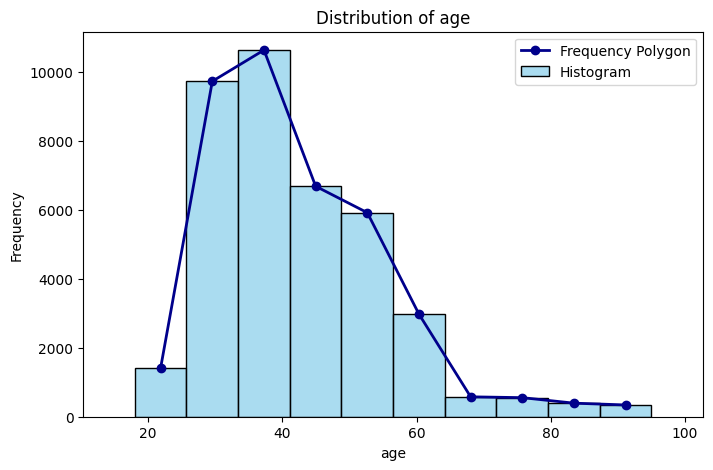

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


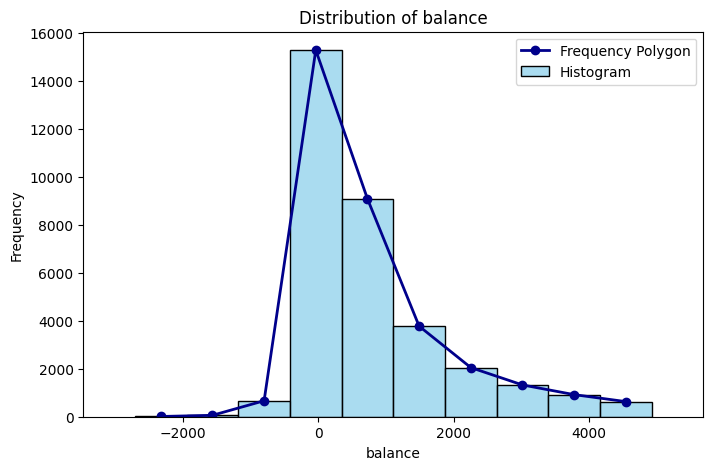

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


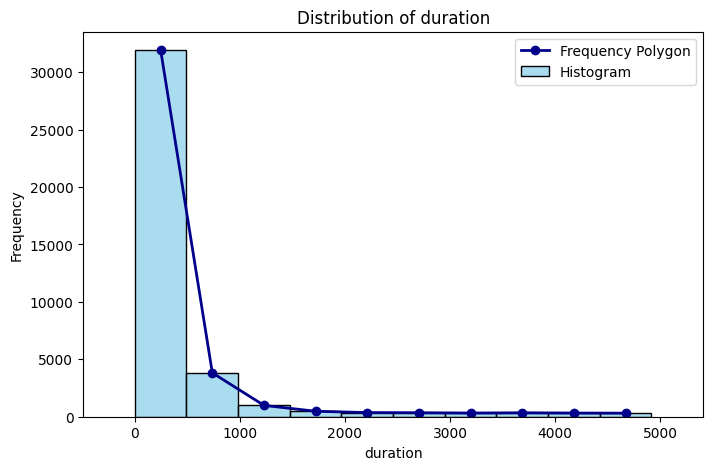

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


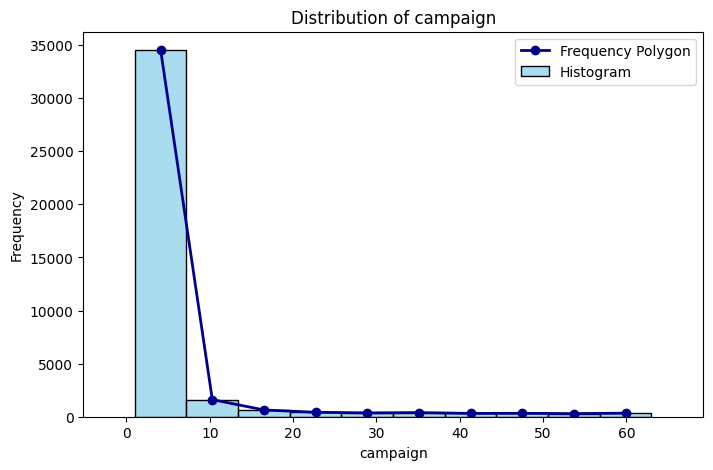

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


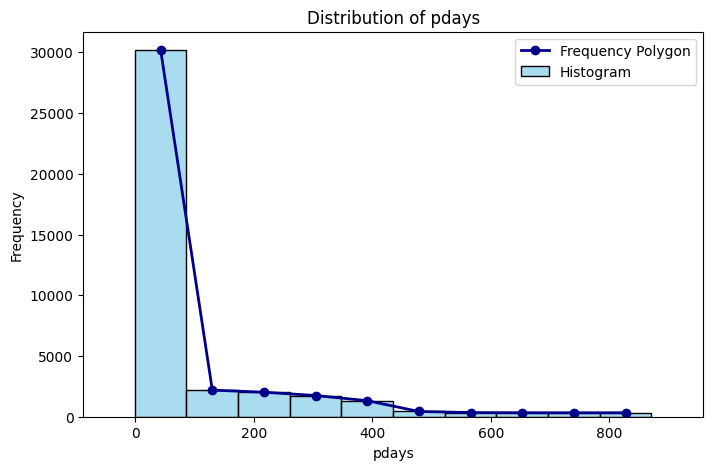

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


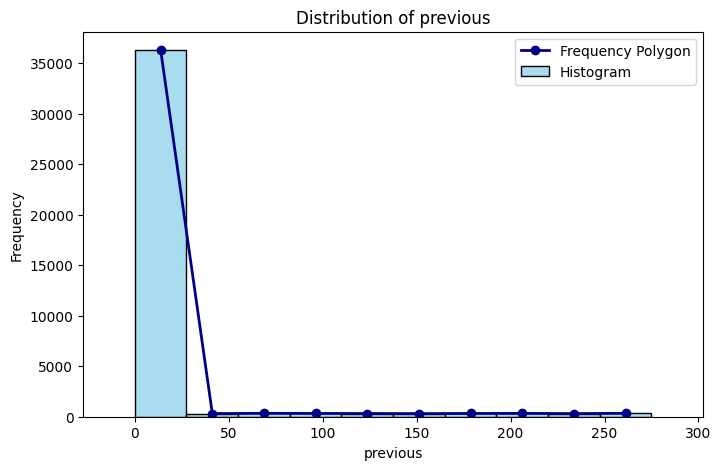

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defining the features to visualize
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']  # Replace with your numerical column names

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    
    # Determine the range and bin size for the histogram
    feature_min = data[feature].min()
    feature_max = data[feature].max()
    feature_range = feature_max - feature_min
    bin_width = feature_range /10  # Set a reasonable bin width for 30 bins
    bins = np.arange(feature_min, feature_max + bin_width, bin_width)
    
    # Compute histogram data
    counts, bin_edges = np.histogram(data[feature], bins=bins)
    bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2  # Midpoints of the bins
    
    # Plot histogram with black bar outlines
    sns.histplot(data[feature], bins=bins, kde=False, color="skyblue", edgecolor="black", alpha=0.7, label="Histogram")
    
    # Plot frequency polygon
    plt.plot(bin_midpoints, counts, color="darkblue", linewidth=2, marker='o', label="Frequency Polygon")
    
    # Add titles and labels
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    
    # Adjust the x-axis scale for better visualization
    plt.xlim(feature_min - bin_width, feature_max + bin_width)  # Add a margin for better view
    
    plt.show()


# CATEGORICAL FEATURES DISTRIBUTION AND FEATURE TARGET RELATIONSHIP

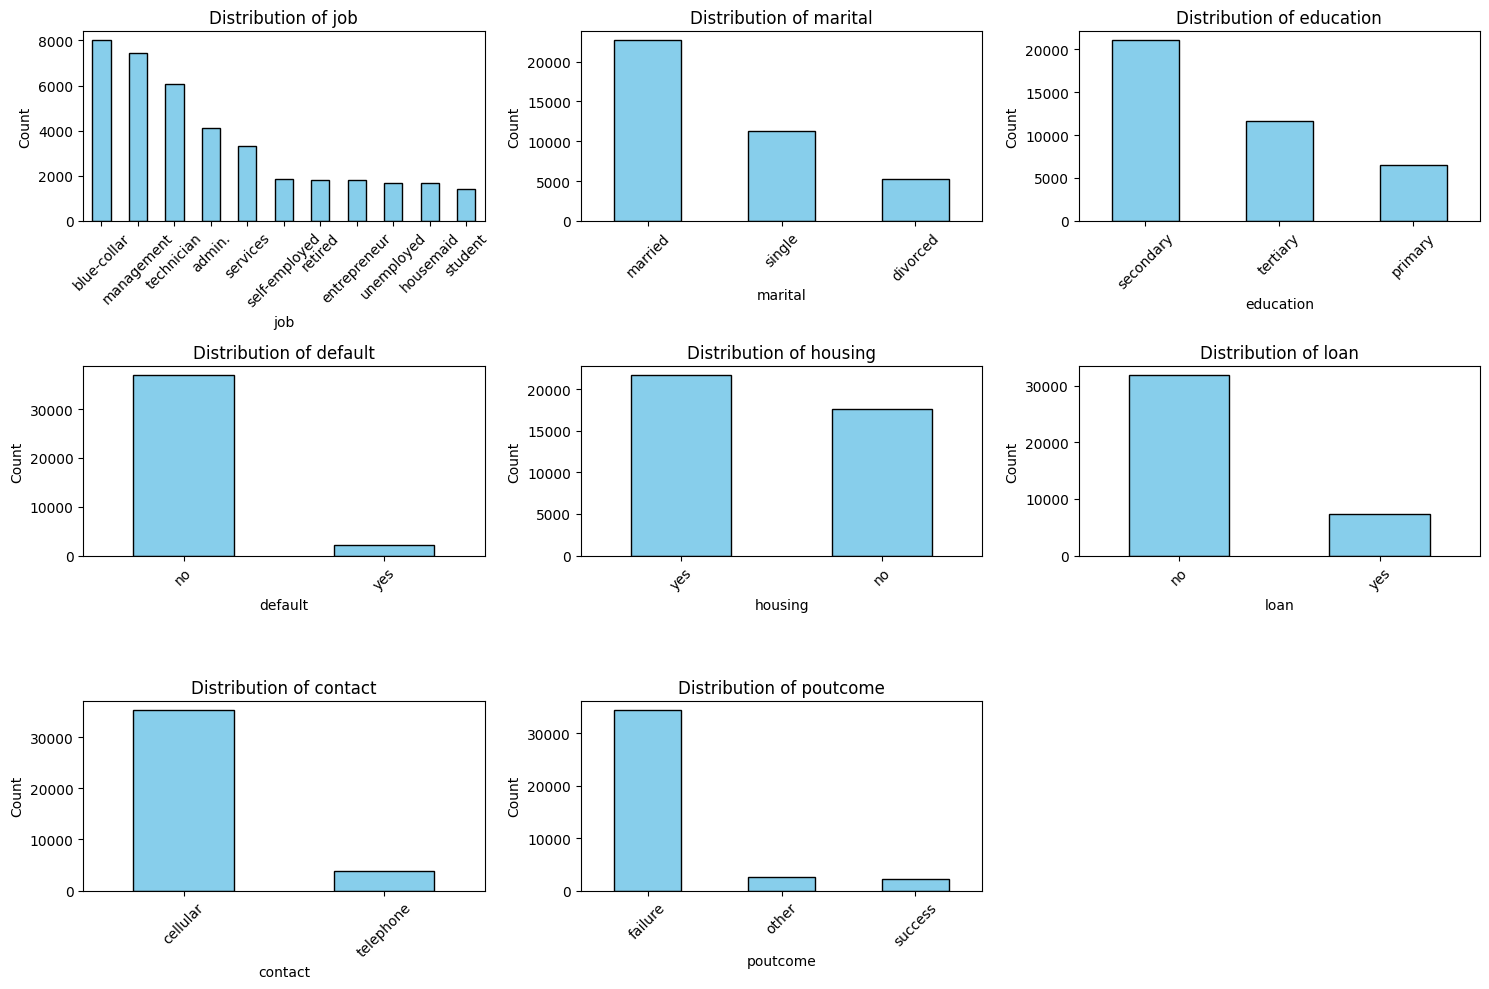

In [18]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Set up the plot
plt.figure(figsize=(15, 10))

# Loop over each categorical column and plot
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Create subplots (3 rows and 3 columns)
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



# Distribution of Categorical Variables
* **Job**:The most common job types are **blue-collar**, **management**, and **technician**, while job types like student and retired are much less common.This suggests that the majority of people in the dataset have more traditional, working-class jobs.
* **Marital Status**:**Married individuals** make up the largest group, followed by **single people**. The divorced group is the smallest.The majority of clients in the dataset are married, which could influence the likelihood of subscribing to a term deposit.
* **Education**:The majority of clients have secondary education, with fewer clients having tertiary or primary education.
* **Default** :The vast majority of clients have not defaulted.(marked by no)
* **Housing**:A significant proportion of clients have a housing loan (marked by "yes"), while a smaller group does not.Having a housing loan might correlate with clients’ financial situation, potentially impacting their decision to subscribe to a term deposit.
* **Loan** (Has Personal Loan):Most clients do not have a personal loan, with only a small fraction of clients having one.Similar to housing loans, this could provide insights into financial stability, which may affect the likelihood of subscribing to a term deposit.
* **Contact Communication Type**:Cellular phones are the most common contact method, followed by telephone.This reflects modern communication trends and could impact how clients respond to marketing efforts.
* **Poutcome**:A large number of clients have a failure outcome from the previous campaign, with very few clients having a success or other outcome.This indicates that previous campaigns may not have been very successful, which could influence the effectiveness of current marketing strategies.




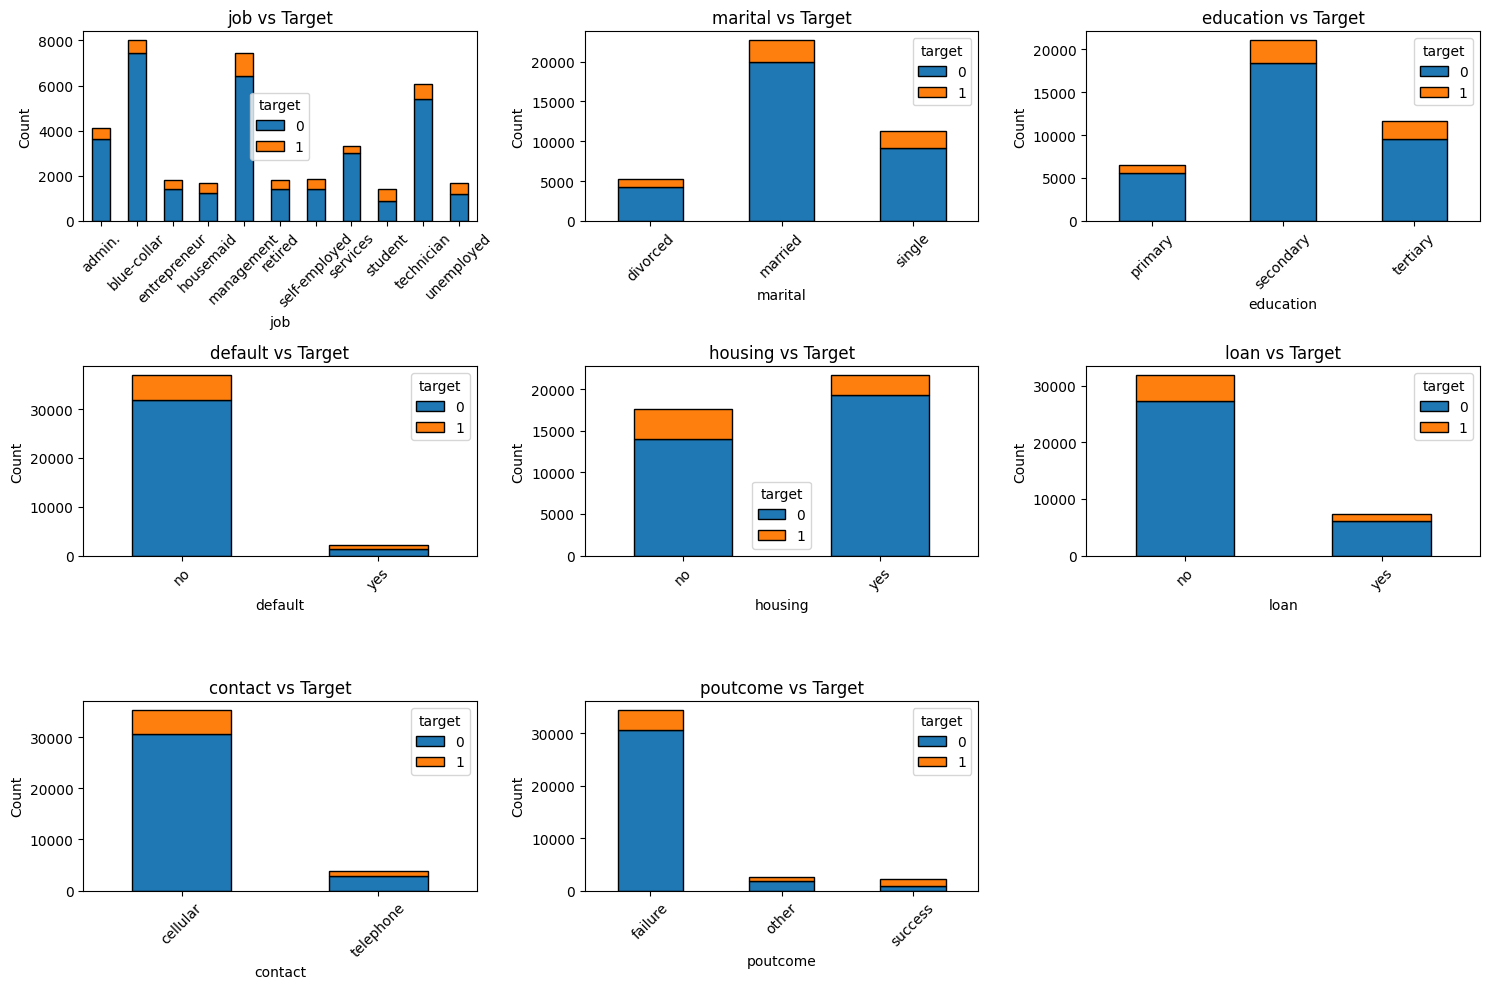

In [19]:
import seaborn as sns

# Plot stacked bar charts for each categorical feature vs. target
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    pd.crosstab(data[column], data['target']).plot(kind='bar', stacked=True, edgecolor='black', ax=plt.gca())
    plt.title(f'{column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Feature Target Relationship

* **Job vs Target** :
Admin, blue-collar, and management jobs are more likely to have clients who did not subscribe to a term deposit (target = 0).Entrepreneur, student, and retired job types show a higher proportion of target = 1 (subscribed clients).Clients in more managerial or professional roles tend to be less likely to subscribe, while those in less traditional or lower-income roles might be more interested in term deposits.

* **Marital Status vs Target** :
Married individuals are more likely to not subscribe to a term deposit (dominantly target = 0).Single individuals show a slightly higher likelihood of subscribing to a term deposit.Divorced individuals also tend to have a higher subscription rate, similar to the single group.

* **Education vs Target** :
Clients with secondary education are mostly non-subscribers (target = 0), while tertiary and primary education groups have a more balanced split, with tertiary showing a higher proportion of subscribers.Primary education shows fewer total records, but the few subscribers suggest there may be an interesting segment in this group.

* **Default vs Target** :
Clients without credit in default (marked by "no") are overwhelmingly non-subscribers.Very few clients have credit in default (marked by "yes"), and those who do tend to have target = 0 (did not subscribe), indicating that clients who have defaulted are less likely to subscribe.

* **Housing (Has Housing Loan) vs Target** :
Clients who have a housing loan (marked by "yes") are more likely to be non-subscribers to a term deposit.The number of subscribers with a housing loan is still significant, but the trend favors non-subscribers in this category.

* **Loan (Has Personal Loan?) vs Target** :
Clients without a personal loan are overwhelmingly non-subscribers (target = 0), whereas clients with a personal loan are more likely to subscribe (target = 1), although still a minority.

* **Contact Communication Type vs Target** :
Cellular is the dominant contact method, and clients contacted via cellular are mostly non-subscribers.Very few clients were contacted via telephone, but the few who were contacted tend to have a higher subscription rate.

* **Poutcome (Outcome of Previous Campaign) vs Target** :
The failure outcome from previous campaigns is strongly associated with non-subscribers to the term deposit (dominantly target = 0).The success outcome shows a very small group of subscribers, suggesting that a successful prior campaign may increase the likelihood of subscription.


In [20]:
for i in data.columns:
    print(f"{i} : {len(data[i].unique())}") #Finding out number of unique values for each feature

age : 78
job : 11
marital : 3
education : 3
default : 2
balance : 4859
housing : 2
loan : 2
contact : 2
duration : 3146
campaign : 63
pdays : 865
previous : 276
poutcome : 3
target : 2
year : 3


In [21]:
data = get_dummies(data,columns=["job","default","marital","education","housing","loan","contact","poutcome"]) #One Hot Encoding categroical variables

In [22]:
test_data = read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv") #Importing the test dataset

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [24]:
test_data.isnull().sum() #Finding out null values in test dataset

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [25]:
#Treating the null values
test_data["job"] = np.where(test_data["job"].isna(),test_data["job"].mode(),test_data["job"])
test_data["education"] = np.where(test_data["education"].isna(),test_data["education"].mode(),test_data["education"])
test_data["contact"] = np.where(test_data["contact"].isna(),test_data["contact"].mode(),test_data["contact"])
test_data["poutcome"] = np.where(test_data["poutcome"].isna(),test_data["poutcome"].mode(),test_data["poutcome"])

In [26]:
test_data.isnull().sum() #The missing values have successfully been replaced

last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
dtype: int64

In [27]:
test_data["last contact date"] = to_datetime(test_data["last contact date"],format="mixed") # Converting 'last contact date ' into a datetime object 

In [28]:
test_data["year"] = test_data["last contact date"].apply(lambda x: x.year) #Extracting the years from the given dates

In [29]:
test_data.drop(columns=["last contact date"],inplace = True) #Dropping the 'last contact date' column 

In [30]:
test_data = get_dummies(test_data,columns=["job","default","marital","education","housing","loan","contact","poutcome"]) # One Hot Encoding the Categorical variables in the test data

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  10000 non-null  int64
 1   balance              10000 non-null  int64
 2   duration             10000 non-null  int64
 3   campaign             10000 non-null  int64
 4   pdays                10000 non-null  int64
 5   previous             10000 non-null  int64
 6   year                 10000 non-null  int64
 7   job_admin.           10000 non-null  bool 
 8   job_blue-collar      10000 non-null  bool 
 9   job_entrepreneur     10000 non-null  bool 
 10  job_housemaid        10000 non-null  bool 
 11  job_management       10000 non-null  bool 
 12  job_retired          10000 non-null  bool 
 13  job_self-employed    10000 non-null  bool 
 14  job_services         10000 non-null  bool 
 15  job_student          10000 non-null  bool 
 16  job_technician       10

In [32]:
test_data.to_csv("transformed_test.csv",index=False) #Saving the formatted test dataset

In [33]:
from sklearn.model_selection import train_test_split 

In [34]:
x = data.drop(columns=["target"]) #dropping the target column
y = data["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42) #"Splitting the dataset into training (80%) and testing (20%) sets

In [35]:
x_train.isnull().sum() #checking x train for null values

age                       0
balance                4287
duration                  0
campaign                  0
pdays                     0
previous                  0
year                      0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
default_no                0
default_yes               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
housing_no                0
housing_yes               0
loan_no                   0
loan_yes                  0
contact_cellular          0
contact_telephone         0
poutcome_failure          0
poutcome_other            0
poutcome_success          0
dtype: int64

In [36]:
x_train['balance'].fillna(x_train['balance'].mean(),inplace=True) #Replacing null values

/tmp/ipykernel_17/4024555072.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['balance'].fillna(x_train['balance'].mean(),inplace=True) #Replacing null values


In [37]:
x_train.isnull().sum() #Null values have been replaced succefully

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
year                   0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
default_no             0
default_yes            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
dtype: int64

In [38]:
x_test.isnull().sum() # Checking for null values in x_test

age                       0
balance                1087
duration                  0
campaign                  0
pdays                     0
previous                  0
year                      0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
default_no                0
default_yes               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
housing_no                0
housing_yes               0
loan_no                   0
loan_yes                  0
contact_cellular          0
contact_telephone         0
poutcome_failure          0
poutcome_other            0
poutcome_success          0
dtype: int64

In [39]:
x_test['balance'].fillna(x_test['balance'].mean(),inplace=True) #Replacing the null values

/tmp/ipykernel_17/3005434533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['balance'].fillna(x_test['balance'].mean(),inplace=True) #Replacing the null values


In [40]:
x_test.isnull().sum() # Successfully replaced the null values

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
year                   0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
default_no             0
default_yes            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
dtype: int64

# MODEL 1 : DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
DT = DecisionTreeClassifier()

In [43]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
from sklearn.metrics import classification_report

In [45]:
y_pred = DT.predict(x_test)

In [46]:
DT.get_depth()#Finding out max depth of the tree

33

In [47]:
print(classification_report(y_test,y_pred)) # vague run

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6645
           1       0.42      0.43      0.42      1198

    accuracy                           0.82      7843
   macro avg       0.66      0.66      0.66      7843
weighted avg       0.82      0.82      0.82      7843



# HYPERPARAMETER TUNING

in the below code, I performed manual hyperparameter tuning on the Decision Tree model to optimize its performance. Specifically, I focused on two hyperparameters: **min_samples_split and min_samples_leaf.**

**min_samples_split:** This parameter controls the minimum number of samples required to split an internal node. I experimented with different values (from 2 to 4) to determine the optimal value that maximizes the model's F1 score. A lower value allows the tree to grow deeper, while a higher value restricts the tree’s growth, which can help prevent overfitting.

**min_samples_leaf:** This parameter specifies the minimum number of samples required to be at a leaf node. I kept it fixed at 1 for the experiments, meaning each leaf could contain a single sample. This is typically used to allow the model to learn from every individual sample but can lead to overfitting if not carefully controlled.

For each combination of hyperparameters, I trained the Decision Tree model and evaluated its performance using the F1 score and accuracy on the training data. By manually adjusting these values and observing their impact on the **F1 score adn accuracy** , I aimed to find the best configuration that improves the model's performance while balancing bias and variance.

In [48]:
for i in range(1,27):
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_train)
    print("MAX DEPTH = ",i)
    print(classification_report(y_train,y_pred))

MAX DEPTH =  1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     26739
           1       0.00      0.00      0.00      4629

    accuracy                           0.85     31368
   macro avg       0.43      0.50      0.46     31368
weighted avg       0.73      0.85      0.78     31368

MAX DEPTH =  2
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     26739
           1       0.55      0.51      0.53      4629

    accuracy                           0.87     31368
   macro avg       0.73      0.72      0.73     31368
weighted avg       0.86      0.87      0.86     31368



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH =  3
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     26739
           1       0.57      0.52      0.54      4629

    accuracy                           0.87     31368
   macro avg       0.74      0.73      0.73     31368
weighted avg       0.87      0.87      0.87     31368

MAX DEPTH =  4
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     26739
           1       0.61      0.35      0.45      4629

    accuracy                           0.87     31368
   macro avg       0.75      0.66      0.69     31368
weighted avg       0.85      0.87      0.86     31368

MAX DEPTH =  5
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     26739
           1       0.60      0.47      0.53      4629

    accuracy                           0.88     31368
   macro avg       0.75      0.71      0.73     31368
weighted avg       0.87      

In [49]:
for i in range(1,15):
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_test)
    print("MAX DEPTH = ",i)
    print(classification_report(y_test,y_pred))

MAX DEPTH =  1
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6645
           1       0.00      0.00      0.00      1198

    accuracy                           0.85      7843
   macro avg       0.42      0.50      0.46      7843
weighted avg       0.72      0.85      0.78      7843

MAX DEPTH =  2
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      6645
           1       0.54      0.49      0.51      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.71      0.71      7843
weighted avg       0.85      0.86      0.85      7843

MAX DEPTH =  3
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      6645
           1       0.55      0.50      0.53      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.71      0.72      7843
weighted avg       0.86      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAX DEPTH =  4
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      6645
           1       0.57      0.33      0.42      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.64      0.67      7843
weighted avg       0.84      0.86      0.84      7843

MAX DEPTH =  5
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6645
           1       0.56      0.45      0.50      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.69      0.71      7843
weighted avg       0.85      0.86      0.86      7843

MAX DEPTH =  6
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6645
           1       0.58      0.35      0.44      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.65      0.68      7843
weighted avg       0.84      

In [50]:
# so
DT = DecisionTreeClassifier(max_depth=11)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [51]:
DT.min_samples_split  #Sets the minimum number of samples required to split an internal node

2

In [52]:
DT.min_samples_leaf #Sets the minimum number of samples required to be at a leaf node

1

In [53]:
for i in range(2,5):
    DT = DecisionTreeClassifier(max_depth=11,min_samples_split=i,min_samples_leaf=1)
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_train)
    print(classification_report(y_train,y_pred))  #evaluating how changing the min_samples_split parameter affects the model's performance on the training data

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26739
           1       0.77      0.54      0.64      4629

    accuracy                           0.91     31368
   macro avg       0.85      0.76      0.79     31368
weighted avg       0.90      0.91      0.90     31368

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26739
           1       0.77      0.54      0.64      4629

    accuracy                           0.91     31368
   macro avg       0.85      0.76      0.79     31368
weighted avg       0.90      0.91      0.90     31368

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26739
           1       0.77      0.54      0.64      4629

    accuracy                           0.91     31368
   macro avg       0.85      0.76      0.79     31368
weighted avg       0.90      0.91      0.90     31368



In [54]:
for i in range(1,5):
    DT = DecisionTreeClassifier(max_depth=11,min_samples_split=2,min_samples_leaf=i)
    DT.fit(x_train,y_train)
    y_pred = DT.predict(x_train)
    print(classification_report(y_train,y_pred)) #evaluatig how changing the min_samples_leaf parameter affects the model's performance on the training data

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     26739
           1       0.77      0.55      0.64      4629

    accuracy                           0.91     31368
   macro avg       0.85      0.76      0.79     31368
weighted avg       0.90      0.91      0.90     31368

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26739
           1       0.77      0.53      0.62      4629

    accuracy                           0.91     31368
   macro avg       0.85      0.75      0.79     31368
weighted avg       0.90      0.91      0.90     31368

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26739
           1       0.75      0.53      0.62      4629

    accuracy                           0.91     31368
   macro avg       0.84      0.75      0.78     31368
weighted avg       0.90      0.91      0.90     31368

              preci

In [55]:
test_data = read_csv("transformed_test.csv")

In [56]:

DT = DecisionTreeClassifier(max_depth=11,min_samples_split=3,min_samples_leaf=1)
DT.fit(x_train,y_train) #Training a Decision Tree Classifier with a maximum depth of 11, a minimum of 3 samples required to split a node, and at least 1 sample required in each leaf node

DecisionTreeClassifier(max_depth=11, min_samples_split=3)

In [57]:
DT.predict(test_data)

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
dataframe = DataFrame({"id":range(len(DT.predict(test_data))),"target":DT.predict(test_data)})
dataframe.to_csv("Final_submission.csv",index=False)

In [59]:
DT = DecisionTreeClassifier(max_depth=11,min_samples_split=3,min_samples_leaf=1)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_train)
classification_report_DT = classification_report(y_train,y_pred)

In [60]:
print(f"Classification Report:\n{classification_report_DT}")

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     26739
           1       0.77      0.54      0.64      4629

    accuracy                           0.91     31368
   macro avg       0.85      0.76      0.79     31368
weighted avg       0.90      0.91      0.90     31368



# MODEL 2 : RANDOM FOREST

In [61]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [62]:
train_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

In [63]:
# Converting 'last contact date' to datetime and create new features
train_data['last contact date'] = pd.to_datetime(train_data['last contact date'], errors='coerce')
test_data['last contact date'] = pd.to_datetime(test_data['last contact date'], errors='coerce')

train_data['contact_month'] = train_data['last contact date'].dt.month
train_data['contact_day'] = train_data['last contact date'].dt.dayofweek
test_data['contact_month'] = test_data['last contact date'].dt.month
test_data['contact_day'] = test_data['last contact date'].dt.dayofweek

# Dropping unnecessary columns
train_data.drop(columns=['last contact date'], inplace=True)
test_data.drop(columns=['last contact date'], inplace=True)

# Handling missing values for numeric columns
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
imputer = SimpleImputer(strategy='mean')
train_data[numeric_cols] = imputer.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = imputer.transform(test_data[numeric_cols])

# Handling missing values for categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Encoding categorical variables using one-hot encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_cols)
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols)

# Aligning train and test data to have the same columns
train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='left', axis=1, fill_value=0)

/tmp/ipykernel_17/4158925893.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(train_data[col].mode()[0], inplace=True)
/tmp/ipykernel_17/4158925893.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [64]:
# Feature scaling for numeric columns
scaler = StandardScaler()
train_data_encoded[numeric_cols] = scaler.fit_transform(train_data_encoded[numeric_cols])
test_data_encoded[numeric_cols] = scaler.transform(test_data_encoded[numeric_cols])

# Encoding the target variable
label_encoder = LabelEncoder()
train_data_encoded['target'] = label_encoder.fit_transform(train_data['target'])

# Separating features and target
X = train_data_encoded.drop(columns=["target"])
y = train_data_encoded["target"]

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Training a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluating the model
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_RF = classification_report(y_test, y_pred)

# Printing results
print(f"F1 Score: {f1}")
print(f"Accuracy: {acc}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{classification_report_RF}")

F1 Score: 0.7443721191138546
Accuracy: 0.8559224786433762
Confusion Matrix:
[[5947  698]
 [ 432  766]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6645
           1       0.52      0.64      0.58      1198

    accuracy                           0.86      7843
   macro avg       0.73      0.77      0.74      7843
weighted avg       0.87      0.86      0.86      7843



In [66]:
test_data_encoded.drop(columns=["target"],inplace=True)

In [67]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluate the model
y_pred = model.predict(test_data_encoded)

In [68]:
def change(value):
    if value==1:
        return "yes"
    else:
        return "no"

data_RF = pd.DataFrame({"id":range(len(y_pred)),"target":y_pred})
data_RF["target"] = data_RF["target"].apply(change)
data_RF.to_csv("Final_submission_RF.csv",index=False)

In [69]:
from sklearn.linear_model import LogisticRegression

# MODEL 3 : LOGISTIC REGRESSION

In [70]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

In [71]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [72]:
y_pred = logistic_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_LR = classification_report(y_test, y_pred)

# Display results
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{cm}")
print(f"Classification Report:\n{classification_report_LR}")

F1 Score: 0.6217721574452496
Accuracy: 0.8563049853372434
Confusion Matrix:
[[6446  199]
 [ 928  270]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6645
           1       0.58      0.23      0.32      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843



# MODEL 4 : XGBOOST 

In [73]:
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

In [74]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,  # Number of trees
    learning_rate=0.1, # Step size shrinkage
    max_depth=6,       # Maximum depth of trees
    subsample=0.8,     # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42,   # For reproducibility
    use_label_encoder=False  # To avoid encoding warnings
)

In [75]:
# Training the model
xgb_model.fit(x_train, y_train, eval_metric="logloss")

# Making predictions
y_pred = xgb_model.predict(x_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Computing the macro F1 score
macro_f1 = f1_score(y_test, y_pred, average='macro')

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6645
           1       0.58      0.41      0.48      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.68      0.70      7843
weighted avg       0.85      0.86      0.85      7843



In [76]:
# Convert predictions to "yes" and "no"
y_pred_xgb = ["yes" if pred == 1 else "no" for pred in y_pred]

# Create submission file
submission_xgb = pd.DataFrame({
    "id": range(len(y_test)),  # ID starts from 0
    "target": y_test          # Predicted values
})

# Save submission file
submission_xgb.to_csv("submission_xgboost.csv", index=False)
print("XGBoost submission file saved: 'submission_xgboost.csv'")

XGBoost submission file saved: 'submission_xgboost.csv'


# COMPARISON OF CLASSIDFCATION REPORTS OF ALL MODELS

In [77]:
print(f"Classification Report Logistic Regression:\n{classification_report_LR}")
print(f"Classification Report XGBoost:\n{classification_report(y_test, y_pred)}")
print(f"Classification Report Random Forest:\n{classification_report_RF}")
print(f"Classification Report Decision Tree:\n{classification_report_DT}")

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6645
           1       0.58      0.23      0.32      1198

    accuracy                           0.86      7843
   macro avg       0.72      0.60      0.62      7843
weighted avg       0.83      0.86      0.83      7843

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      6645
           1       0.58      0.41      0.48      1198

    accuracy                           0.86      7843
   macro avg       0.74      0.68      0.70      7843
weighted avg       0.85      0.86      0.85      7843

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      6645
           1       0.52      0.64      0.58      1198

    accuracy                           0.86      7843
   macro avg     

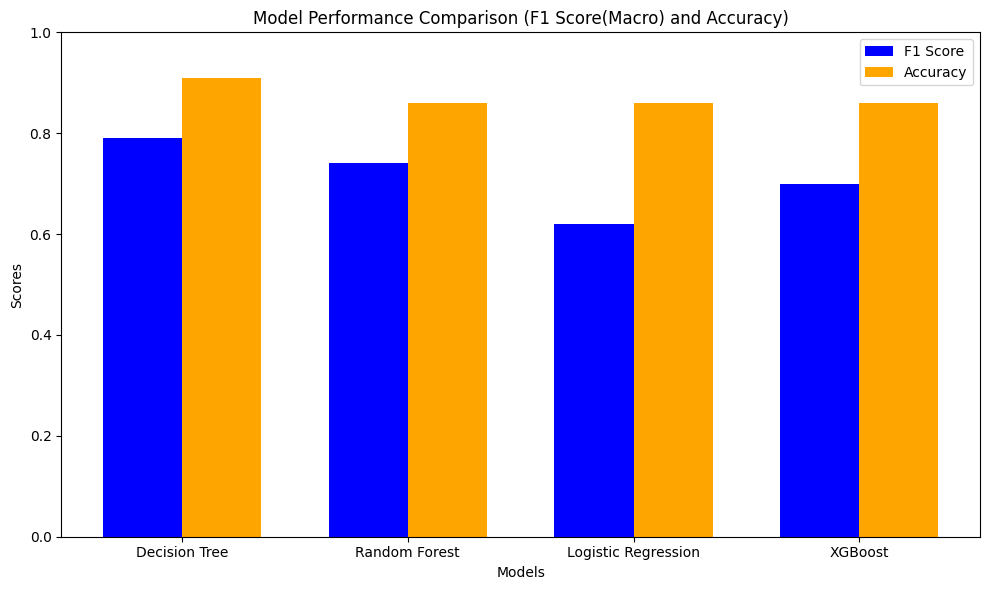

In [78]:
#Model names, F1 scores, and Accuracy scores
model_names = ["Decision Tree", "Random Forest", "Logistic Regression", "XGBoost"]
f1_scores = [0.79, 0.74, 0.62, 0.70]
accuracies = [0.91, 0.86, 0.86, 0.86]

# Set positions for the bars
x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot F1 scores and accuracies side by side
bars_f1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score', color='blue')
bars_accuracy = ax.bar(x + width/2, accuracies, width, label='Accuracy', color='orange')

# Add some text for labels, title and custom x-axis tick labels
ax.set_title('Model Performance Comparison (F1 Score(Macro) and Accuracy)')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Show the plot
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Model Insights and Summary:

**Logistic Regression (LR):**

Accuracy: 86%
Precision (class 0): 87% | Recall (class 0): 97% | F1-score (class 0): 92%
Precision (class 1): 58% | Recall (class 1): 23% | F1-score (class 1): 32%

**Insights:**
The model performs well at predicting class 0 (no subscription) with high precision and recall. However, it struggles to identify class 1 (subscription), with low recall and a significantly lower F1-score.
This suggests that the Logistic Regression model is biased toward predicting class 0, likely due to class imbalance in the dataset.
The macro average metrics indicate that the model is weaker at identifying the minority class (class 1).

**XGBoost:**

Accuracy: 86%
Precision (class 0): 90% | Recall (class 0): 95% | F1-score (class 0): 92%
Precision (class 1): 58% | Recall (class 1): 41% | F1-score (class 1): 48%

**Insights:**
XGBoost improves upon Logistic Regression in terms of recall for class 1 (41%), but still struggles to identify class 1 accurately, as evidenced by a relatively low F1-score.
The weighted average F1-score is higher compared to Logistic Regression, suggesting that the model performs better overall, though it still has a significant class imbalance issue.
Similar to Logistic Regression, the model is stronger at predicting class 0 (non-subscriber) but less effective at predicting class 1.

**Random Forest:**

Accuracy: 86%
Precision (class 0): 93% | Recall (class 0): 89% | F1-score (class 0): 91%
Precision (class 1): 52% | Recall (class 1): 64% | F1-score (class 1): 58%

**Insights:**
Random Forest performs better than Logistic Regression and XGBoost in predicting class 1 with an F1-score of 58%. It has a better balance between precision and recall for class 1.
While precision for class 0 is still high, Random Forest improves recall for class 1 compared to the previous models, though still not enough to address the class imbalance fully.
The macro average F1-score indicates a more balanced model performance across both classes compared to XGBoost and Logistic Regression.

**Decision Tree:**

Accuracy: 91%
Precision (class 0): 92% | Recall (class 0): 97% | F1-score (class 0): 95%
Precision (class 1): 77% | Recall (class 1): 54% | F1-score (class 1): 64%

**Insights:**
The Decision Tree model shows a high performance for class 0, similar to the other models, with excellent precision and recall.
For class 1, precision is good (77%), but recall is lower (54%), leading to an F1-score of 64%.
The macro average F1-score is relatively high (79%), showing that the Decision Tree model strikes a good balance between both classes.
However, the model performed much worse upon submission, which suggests the model might have overfitted the training data, resulting in lower performance on the test dataset.